In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor

## Import Dataset

In [2]:
df_pen = sns.load_dataset('penguins')

In [3]:
df_pen = df_pen.dropna()

In [4]:
df_pen = df_pen.sample(frac=1).reset_index(drop=True)

In [5]:
X = df_pen.drop(['body_mass_g'], axis = 1)
y = df_pen['body_mass_g']

## Data Pre-processing

In [6]:
categorical_x = ['species', 'island', 'sex']
numerical_x = X.drop(categorical_x, axis = 1).columns

In [7]:
# ## If y is categorical:
# # y.fillna(y.mode(), inplace= True)
# ##If y is numerical
# y.fillna(y.mean(), inplace= True)
# for i in numerical_x:
#     X[i].fillna(X[i].mean(), inplace = True)

# for i in categorical_x:
#     X[i].fillna(X[i].mode().iloc[0], inplace = True)
    
categoricas = pd.get_dummies(X[categorical_x], drop_first=True)
X = pd.concat([categoricas, X[numerical_x]], axis = 1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

In [9]:
# escalador = StandardScaler()
# escalador.fit(X_train)

# X_train = escalador.transform(X_train)
# X_test = escalador.transform(X_test)

## Model implementation

In [10]:
rf_model = RandomForestRegressor()

In [11]:
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [12]:
base_preds = rf_model.predict(X_test)

## Evaluation

In [13]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, base_preds)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, base_preds)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, base_preds))}')

Mean Absolute Error: 229.28
Mean Squared Error: 84242.0525
Root Mean Squared Error: 290.2448147684985


In [14]:
rf_model.feature_importances_

array([0.00150946, 0.44318899, 0.00449963, 0.00257281, 0.15093936,
       0.05284117, 0.04871862, 0.29572997])

In [15]:
df_feature_importance = pd.DataFrame(index=X.columns,data=rf_model.feature_importances_,columns=['Feature Importance'])
df_feature_importance = df_feature_importance.sort_values('Feature Importance', ascending = False)
df_feature_importance

,Feature Importance
species_Gentoo,0.443189
flipper_length_mm,0.295730
sex_Male,0.150939
bill_length_mm,0.052841
bill_depth_mm,0.048719
island_Dream,0.004500
island_Torgersen,0.002573
species_Chinstrap,0.001509


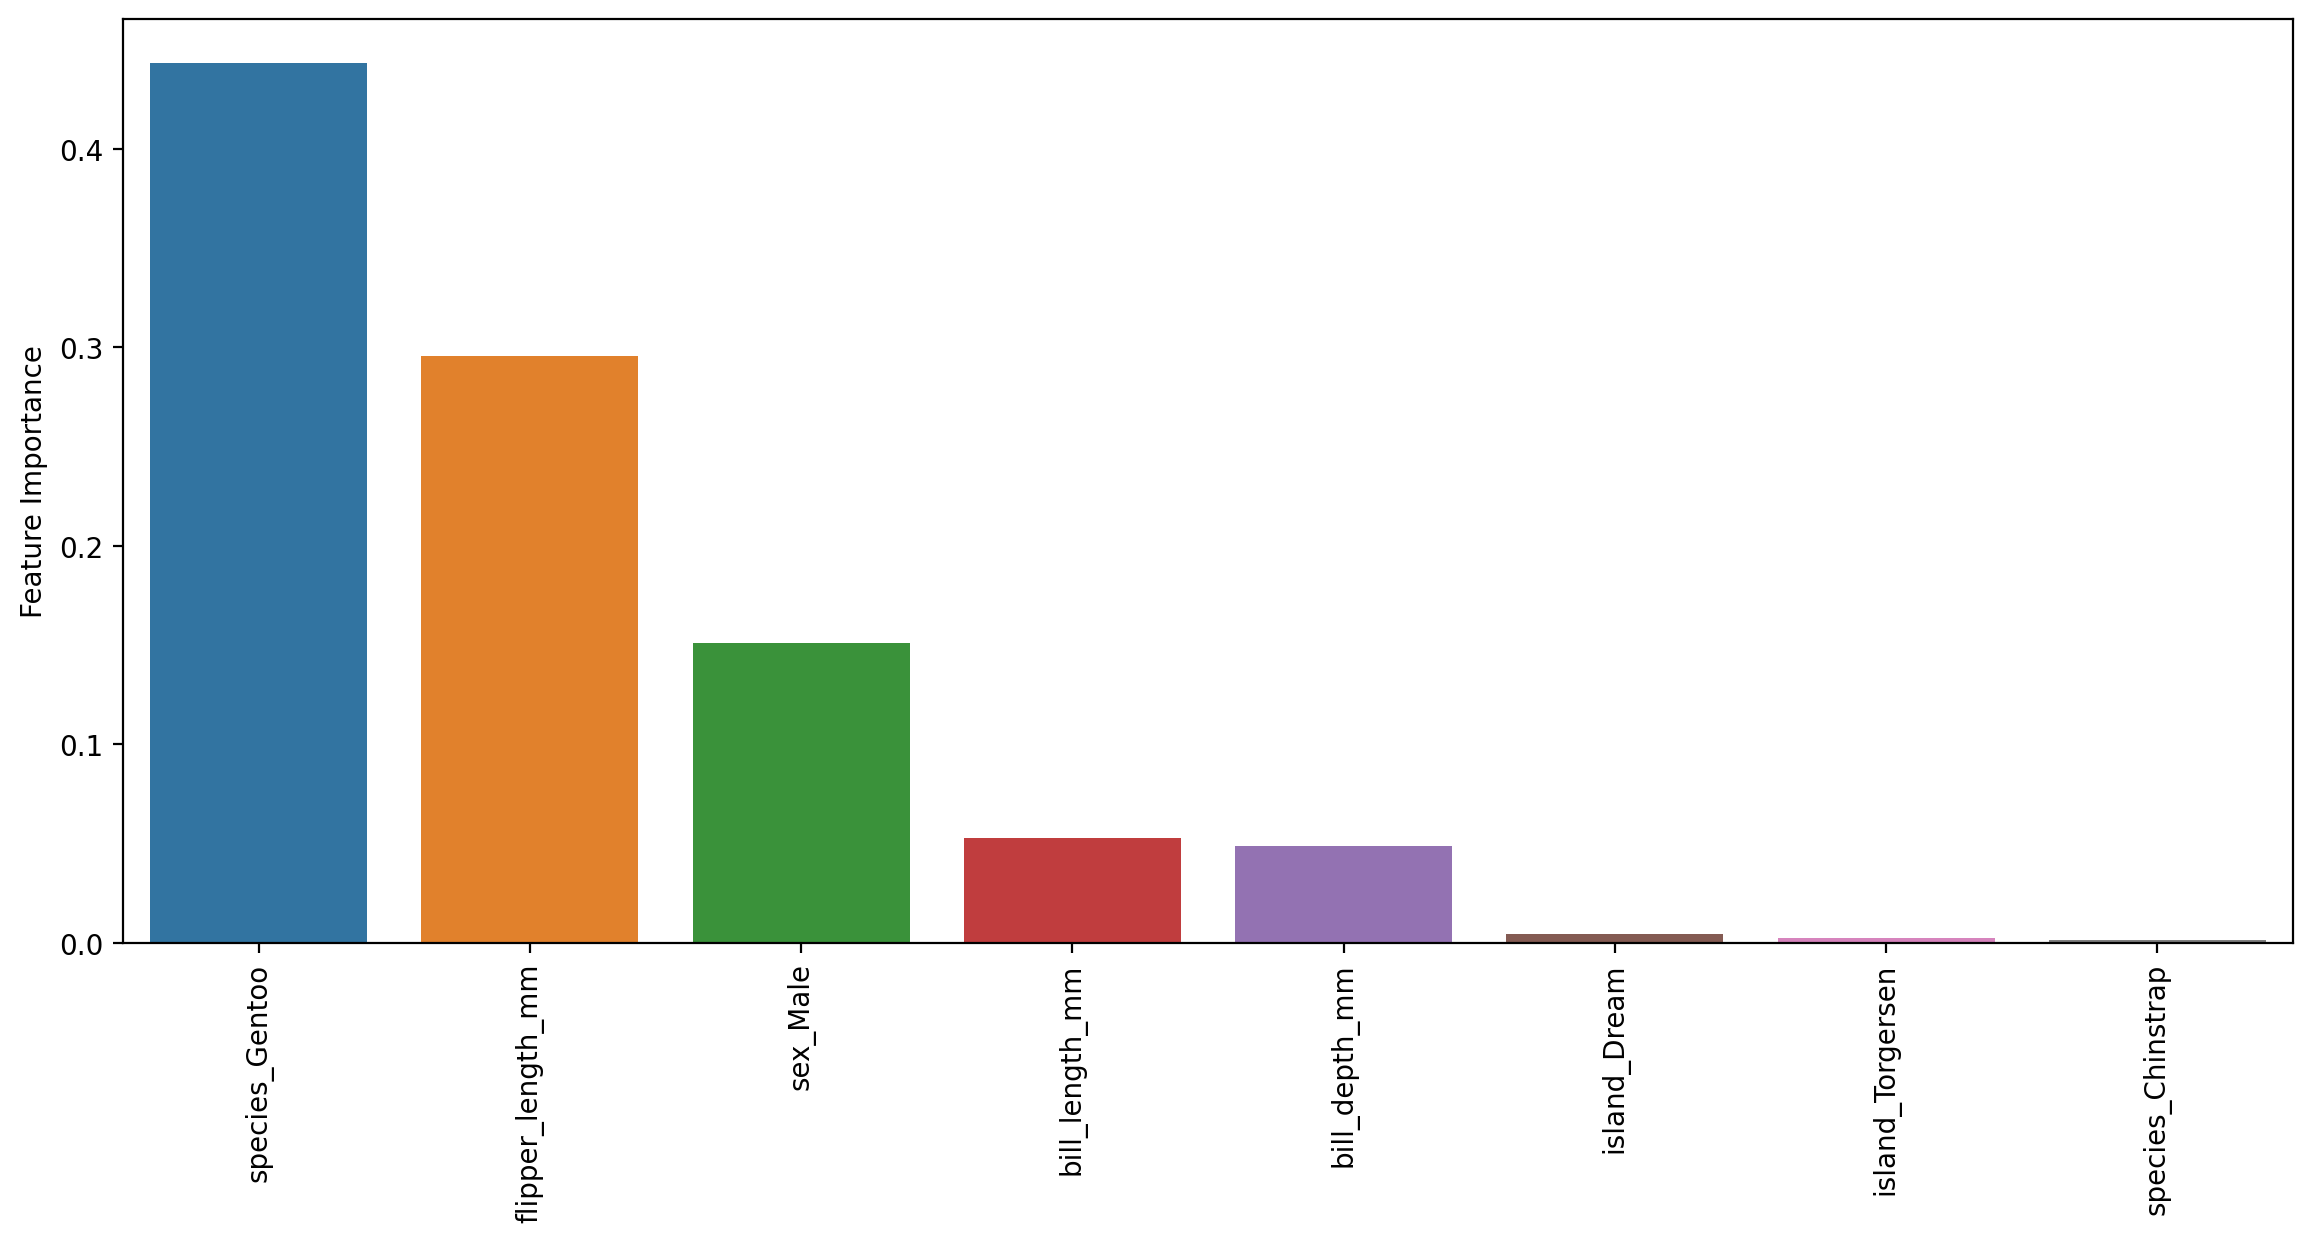

In [16]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=df_feature_importance,x=df_feature_importance.index,y='Feature Importance')
plt.xticks(rotation=90);

## Grid Search

In [17]:
rf_model = RandomForestRegressor()

In [18]:
n_estimators=[64,100,128,200]
max_features= [2,3,4,5]
bootstrap = [True,False]

parametros = {'n_estimators':n_estimators,
              'max_features':max_features,
              'bootstrap':bootstrap}

In [19]:
grid_model = GridSearchCV(rf_model,param_grid= parametros, cv = 5, scoring='neg_mean_squared_error', n_jobs=-1)

In [20]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 3, 4, 5],
                         'n_estimators': [64, 100, 128, 200]},
             scoring='neg_mean_squared_error')

In [21]:
grid_model.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 100}

In [22]:
y_pred = grid_model.predict(X_test)

### Evaluation

In [23]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')

Mean Absolute Error: 243.94333333333336
Mean Squared Error: 95321.91375
Root Mean Squared Error: 308.74247156813396


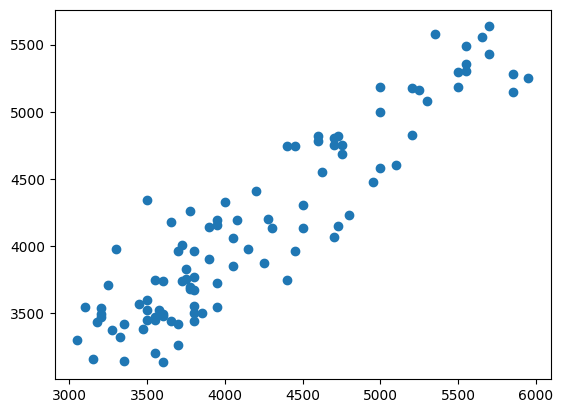

In [24]:
plt.scatter(y_test, y_pred)

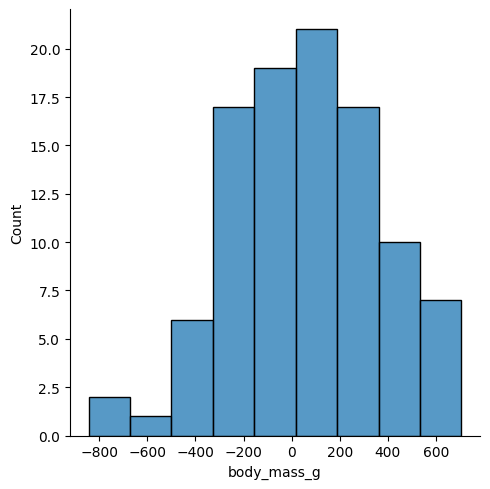

In [25]:
sns.displot(y_test- y_pred)

In [26]:
grid_model.best_estimator_.feature_importances_

array([0.01715129, 0.24243153, 0.04631693, 0.01031044, 0.09422827,
       0.14148644, 0.20277715, 0.24529795])

In [27]:
df_feature_importance = pd.DataFrame(index=X.columns,data=grid_model.best_estimator_.feature_importances_,columns=['Feature Importance'])
df_feature_importance = df_feature_importance.sort_values('Feature Importance', ascending = False)
df_feature_importance

,Feature Importance
flipper_length_mm,0.245298
species_Gentoo,0.242432
bill_depth_mm,0.202777
bill_length_mm,0.141486
sex_Male,0.094228
island_Dream,0.046317
species_Chinstrap,0.017151
island_Torgersen,0.010310


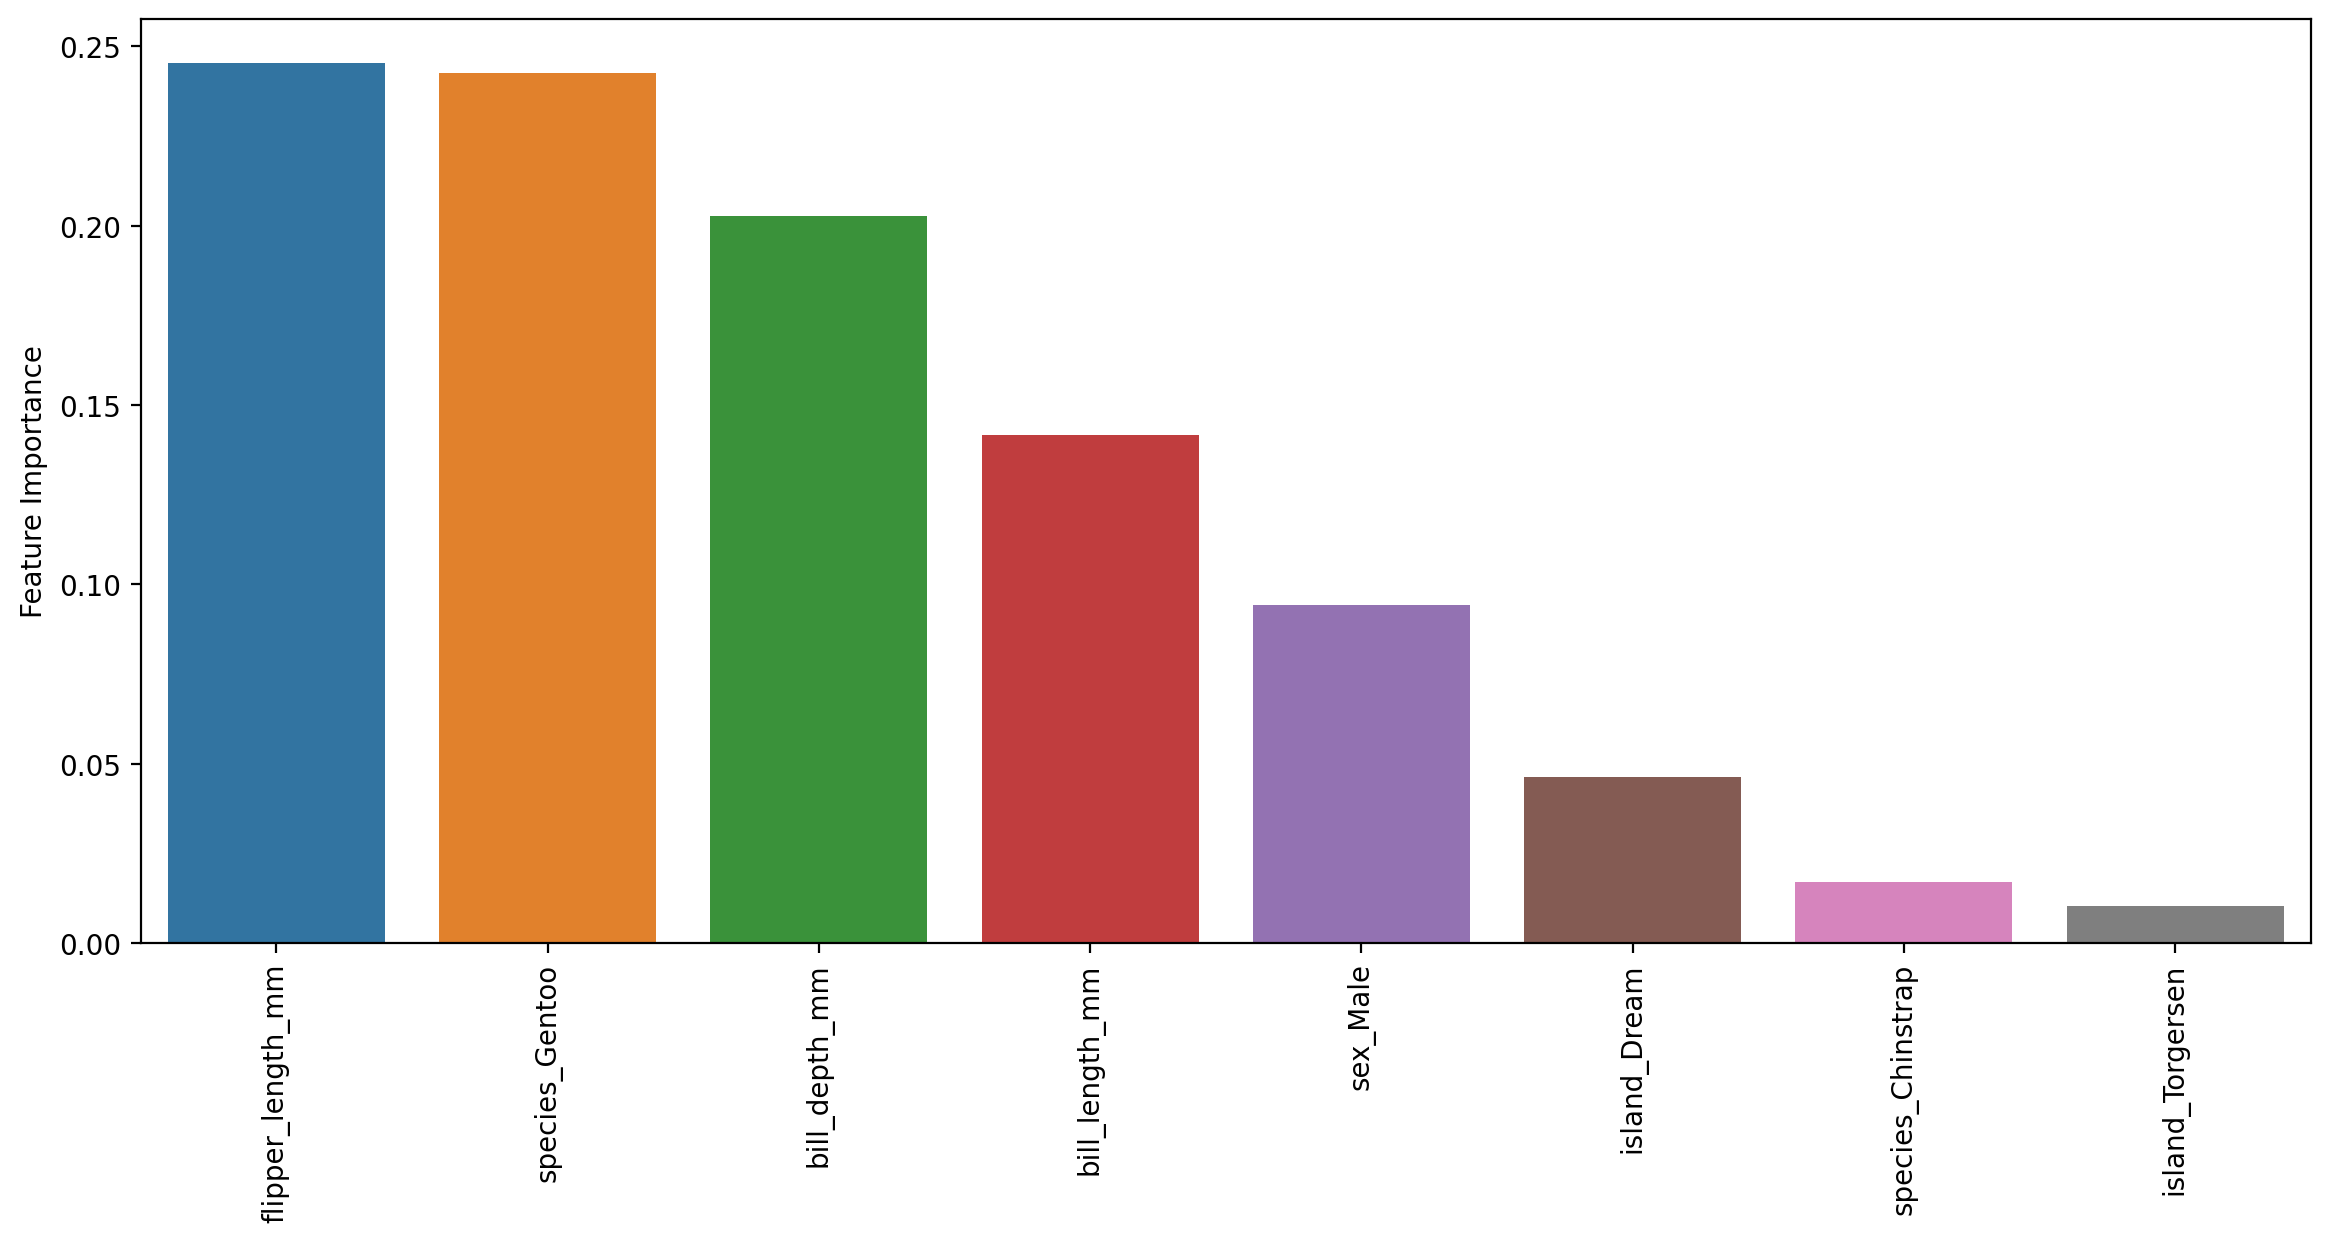

In [28]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=df_feature_importance,x=df_feature_importance.index,y='Feature Importance')
plt.xticks(rotation=90);

## Elbow

In [29]:
errors = []

for n in range(1,128):
    rfc = RandomForestRegressor( n_estimators=n,bootstrap=True,max_features= 2)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = metrics.mean_squared_error(preds,y_test)
    errors.append(err)

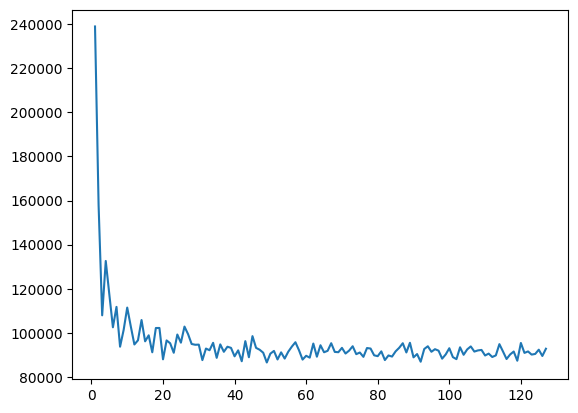

In [30]:
plt.plot(range(1,128),errors)